In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import ast

csv_file_path = "final-file-neural-network.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

colData = df.columns.tolist()

for col in colData:
    if col == "input" or col == 'output':
        df[col] = df[col].apply(ast.literal_eval)
        
df = df[df['input'].apply(len) == 60]
df = df[df['output'].apply(len) == 90]



In [6]:
def merge_input_columns(row):
    return [row['day'], row['month'], row['week'], row['hour']] + row['input']

df['merged_input'] = df.apply(merge_input_columns, axis=1)

X = np.array(df['merged_input'].tolist())
y = np.array(df['output'].tolist())

print(X.shape)
print(y.shape)

train_data_input, train_data_output, test_data_input, test_data_output = X[:6000], y[:6000], X[6000:], y[6000:]

print("-----------")
print(X)
print(y)



(7076, 64)
(7076, 90)
-----------
[[0.000000e+00 1.000000e+00 3.000000e+00 ... 8.285550e+03 8.284200e+03
  8.284350e+03]
 [0.000000e+00 1.000000e+00 3.000000e+00 ... 8.288200e+03 8.287500e+03
  8.287750e+03]
 [0.000000e+00 1.000000e+00 3.000000e+00 ... 8.267900e+03 8.268300e+03
  8.270850e+03]
 ...
 [4.000000e+00 1.000000e+01 4.000000e+00 ... 1.764725e+04 1.764530e+04
  1.764255e+04]
 [4.000000e+00 1.000000e+01 4.000000e+00 ... 1.765575e+04 1.765140e+04
  1.765745e+04]
 [4.000000e+00 1.000000e+01 4.000000e+00 ... 1.759730e+04 1.760020e+04
  1.760230e+04]]
[[ 8289.    8291.85  8285.2  ...  8285.6   8283.2   8285.95]
 [ 8287.4   8285.95  8286.5  ...  8260.2   8252.6   8257.45]
 [ 8292.15  8290.15  8288.5  ...  8271.35  8269.3   8267.85]
 ...
 [17631.7  17632.05 17630.1  ... 17643.5  17647.75 17648.7 ]
 [17645.25 17649.6  17648.25 ... 17635.4  17635.45 17635.5 ]
 [17657.4  17652.95 17653.85 ... 17569.1  17557.4  17531.  ]]


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X and y are your dataset inputs and outputs respectively
# Train-test split
train_data_input, train_data_output = X[:6000], y[:6000]
test_data_input, test_data_output = X[6000:], y[6000:]

# Define the neural network
def create_model():
    model = Sequential([
        Dense(65, activation='linear', input_shape=(64,)),
        Dense(70, activation='linear'),
        Dense(75, activation='linear'),
        Dense(80, activation='linear'),
        Dense(85, activation='linear'),
        Dense(90, activation='linear')  # Output layer with 90 units
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Create the model
model = create_model()

# Display the model summary
model.summary()

# Train the model
model.fit(train_data_input, train_data_output, epochs=50, batch_size=50, shuffle=True)



/home/gitesh/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 65)             │         4,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 70)             │         4,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 75)             │         5,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 80)             │         6,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 85)             │         6,885 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 90)             │         7,740 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,875 (136.23 KB)

 Trainable params: 34,875 (136.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30866092.0000
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 483.3045
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 406.4949
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 419.6289
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 536.2313
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 407.2882
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 393.3922
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 453.1752
Epoch 9/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 432.8265
Epoch 10/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 429.2120
Epoch 11/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 561.1543
Epoch 12/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 636.6927
Epoch 13/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1382.3420
Epoch 14/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 908.2255
Epoch 15/50
120/120 ━━━

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1176.6539
Test loss: 1213.2431640625
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
actual output data: 
[16435.35 16445.35 16447.15 16440.6  16445.05 16437.75 16434.25 16436.05
 16435.4  16432.45 16430.35 16434.65 16437.85 16434.65 16441.25 16432.9
 16432.95 16432.65 16430.7  16430.7  16434.4  16437.5  16436.05 16433.5
 16430.6  16437.5  16437.15 16438.7  16453.25 16456.3  16461.65 16461.1
 16458.05 16455.4  16455.   16449.3  16453.2  16455.25 16448.   16449.75
 16448.8  16451.25 16449.25 16444.25 16441.45 16447.85 16449.35 16447.8
 16452.   16449.4  16443.75 16431.2  16438.25 16439.7  16435.6  16436.6
 16435.8  16439.85 16435.65 16437.3  16444.5  16448.65 16448.9  16452.1
 16446.3  16446.2  16449.2  16451.95 16448.6  16448.   16460.75 16459.45
 16467.   16471.8  16466.1  16464.1  16467.5  16485.55 16501.05 16499.05
 16494.65 16490.75 16483.4  16486.25 16480.7  16482.25 16486.75 16486.3
 16487.15 16486.05]
predicted data output: 
[16440.717 16469

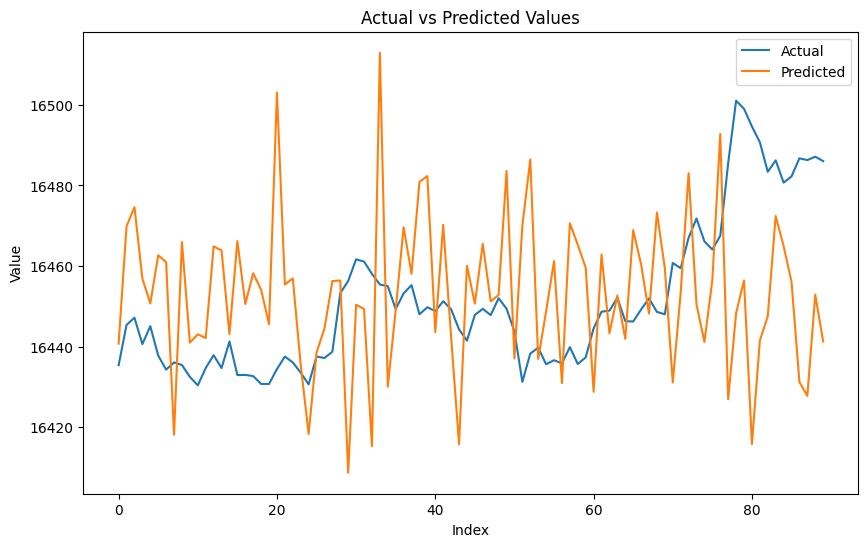

actual output data: 
[16499.15 16510.1  16512.15 16501.4  16517.15 16515.4  16519.1  16521.35
 16520.75 16514.55 16517.55 16510.2  16500.55 16504.2  16501.6  16493.45
 16498.5  16508.3  16508.05 16497.15 16505.25 16507.55 16505.7  16507.4
 16501.05 16497.65 16500.65 16504.35 16497.2  16480.25 16463.   16466.45
 16453.65 16438.05 16425.85 16426.65 16447.15 16447.55 16449.45 16446.15
 16450.4  16459.55 16457.55 16450.6  16443.45 16432.9  16421.4  16416.
 16413.55 16421.85 16401.3  16412.15 16428.25 16418.   16430.15 16421.4
 16431.75 16428.35 16440.45 16442.85 16456.2  16458.4  16464.6  16465.15
 16458.8  16476.95 16479.85 16479.5  16483.65 16478.2  16464.05 16457.95
 16449.8  16454.85 16462.4  16452.6  16450.   16446.25 16464.4  16466.3
 16467.85 16471.8  16474.4  16470.55 16466.45 16472.5  16472.7  16469.25
 16473.1  16477.05]
predicted data output: 
[16492.818 16518.326 16486.42  16469.416 16520.715 16500.852 16495.213
 16476.838 16506.805 16444.78  16454.662 16493.602 16506.719 16481

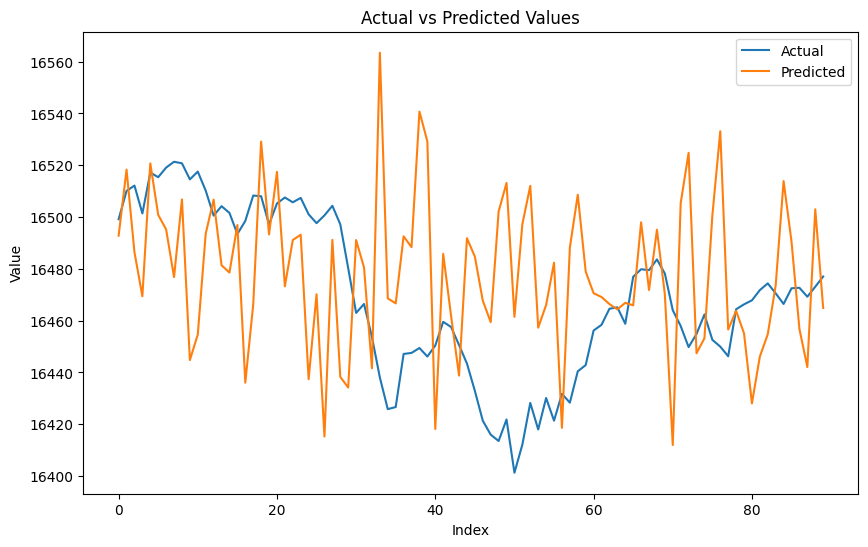

actual output data: 
[16456.2  16458.4  16464.6  16465.15 16458.8  16476.95 16479.85 16479.5
 16483.65 16478.2  16464.05 16457.95 16449.8  16454.85 16462.4  16452.6
 16450.   16446.25 16464.4  16466.3  16467.85 16471.8  16474.4  16470.55
 16466.45 16472.5  16472.7  16469.25 16473.1  16477.05 16486.45 16484.05
 16480.9  16481.9  16483.25 16493.4  16489.95 16490.9  16485.55 16477.45
 16480.85 16476.05 16477.   16474.2  16481.05 16478.2  16482.95 16483.45
 16488.25 16483.65 16486.2  16493.1  16492.75 16490.7  16496.9  16492.45
 16501.8  16498.1  16493.05 16497.95 16495.85 16492.3  16490.1  16491.75
 16494.4  16504.4  16505.65 16504.   16506.65 16508.35 16507.7  16515.4
 16518.8  16513.   16513.7  16513.6  16514.25 16511.25 16512.45 16507.2
 16501.55 16493.45 16493.95 16492.4  16497.8  16490.05 16492.2  16491.6
 16501.3  16502.4 ]
predicted data output: 
[16463.373 16505.02  16509.824 16494.61  16478.014 16490.182 16499.936
 16451.904 16494.291 16475.334 16471.521 16477.562 16495.816 16492

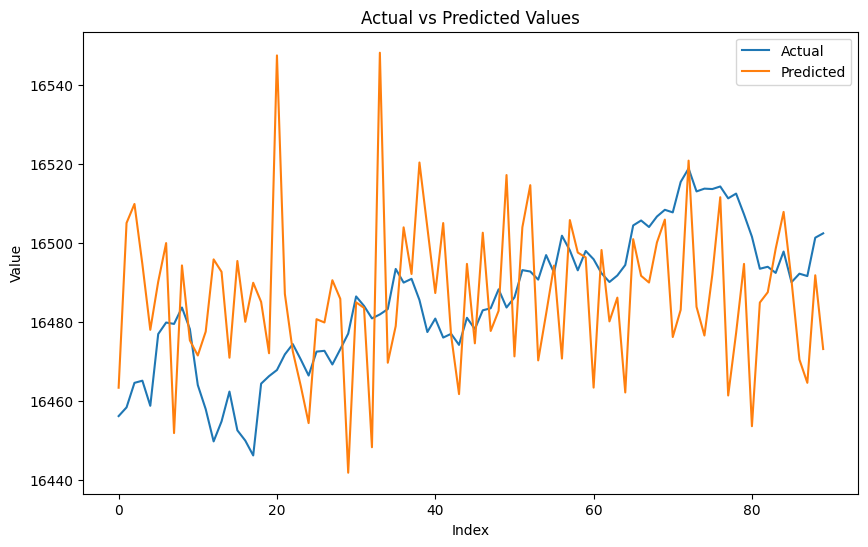

actual output data: 
[16495.85 16492.3  16490.1  16491.75 16494.4  16504.4  16505.65 16504.
 16506.65 16508.35 16507.7  16515.4  16518.8  16513.   16513.7  16513.6
 16514.25 16511.25 16512.45 16507.2  16501.55 16493.45 16493.95 16492.4
 16497.8  16490.05 16492.2  16491.6  16501.3  16502.4  16509.2  16502.
 16506.65 16506.4  16506.1  16499.4  16491.6  16494.   16490.95 16493.25
 16503.35 16501.2  16494.9  16484.5  16485.2  16479.2  16483.55 16489.55
 16494.25 16492.55 16495.95 16495.45 16489.2  16472.75 16480.1  16480.9
 16484.95 16483.9  16479.75 16487.55 16490.45 16483.6  16485.55 16483.6
 16487.8  16486.55 16488.7  16485.5  16482.85 16490.35 16492.35 16497.25
 16502.8  16496.1  16496.45 16500.5  16503.55 16497.5  16499.9  16505.75
 16510.35 16511.25 16507.45 16509.7  16513.5  16510.95 16505.85 16503.95
 16510.3  16509.75]
predicted data output: 
[16499.41  16528.281 16533.803 16506.94  16518.86  16516.184 16515.934
 16483.219 16528.559 16497.633 16498.963 16494.506 16524.543 16518.88

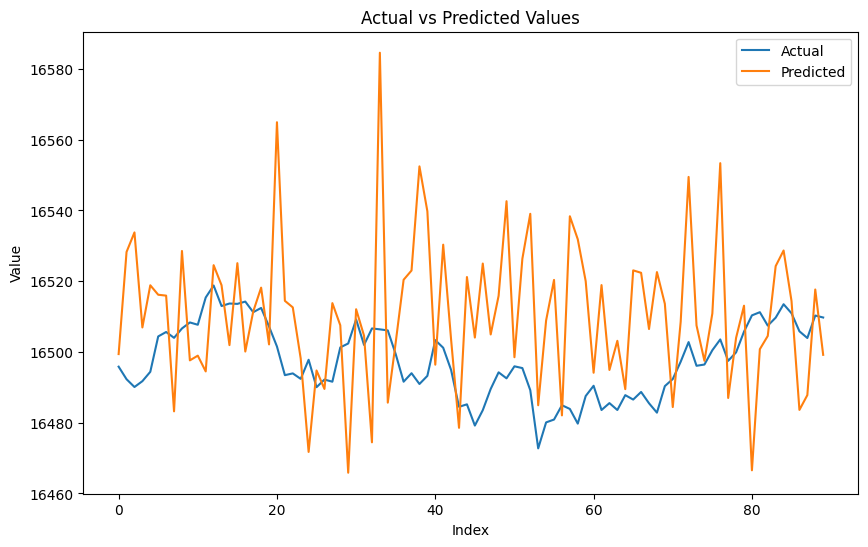

actual output data: 
[16490.45 16483.6  16485.55 16483.6  16487.8  16486.55 16488.7  16485.5
 16482.85 16490.35 16492.35 16497.25 16502.8  16496.1  16496.45 16500.5
 16503.55 16497.5  16499.9  16505.75 16510.35 16511.25 16507.45 16509.7
 16513.5  16510.95 16505.85 16503.95 16510.3  16509.75 16505.3  16500.65
 16501.55 16501.8  16505.75 16509.9  16514.25 16515.45 16511.45 16513.95
 16521.45 16516.9  16512.95 16514.95 16524.15 16525.4  16528.65 16523.5
 16521.95 16513.95 16515.25 16517.9  16509.85 16513.95 16510.2  16509.05
 16507.85 16513.95 16516.2  16520.1  16518.75 16515.3  16521.15 16518.55
 16519.45 16523.75 16519.1  16511.2  16520.55 16521.95 16524.7  16529.6
 16532.35 16529.7  16526.75 16521.45 16514.1  16522.15 16519.75 16518.5
 16518.45 16525.85 16518.3  16513.05 16508.55 16521.4  16518.5  16518.
 16513.7  16516.8 ]
predicted data output: 
[16494.342 16529.84  16541.076 16517.291 16506.346 16513.596 16522.092
 16469.566 16531.104 16507.758 16507.682 16504.01  16536.668 16535.18

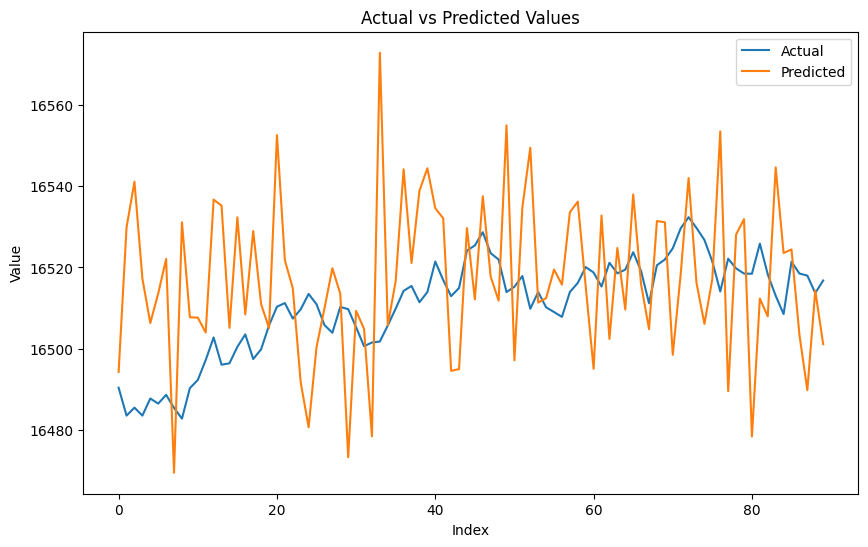

actual output data: 
[16523.35 16520.1  16513.55 16505.05 16509.1  16505.85 16500.6  16503.95
 16505.15 16503.15 16514.35 16515.1  16515.3  16521.65 16515.65 16526.4
 16532.75 16536.6  16542.   16539.75 16544.8  16542.55 16540.65 16537.65
 16538.05 16540.8  16542.75 16537.15 16529.5  16533.7  16535.85 16534.25
 16533.35 16538.65 16539.05 16544.1  16541.35 16538.6  16537.9  16538.5
 16535.4  16534.05 16535.95 16533.75 16532.3  16535.05 16529.3  16531.2
 16525.7  16526.15 16528.4  16530.2  16533.05 16532.3  16535.4  16533.65
 16532.1  16525.95 16531.3  16533.7  16535.5  16533.2  16531.5  16534.1
 16536.6  16533.6  16535.95 16535.9  16532.75 16535.75 16530.65 16533.45
 16534.   16531.1  16532.1  16532.75 16536.35 16536.75 16538.   16538.3
 16541.35 16542.5  16539.45 16539.9  16542.15 16541.65 16544.4  16543.5
 16546.55 16551.  ]
predicted data output: 
[16522.771 16551.814 16556.562 16539.309 16528.9   16536.867 16541.176
 16497.637 16552.29  16523.654 16526.969 16539.305 16558.582 16558.

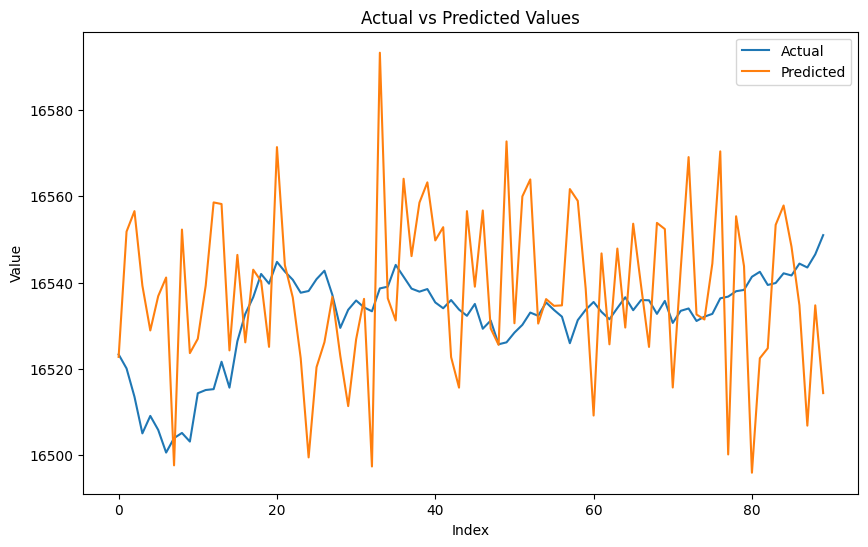

actual output data: 
[16535.5  16533.2  16531.5  16534.1  16536.6  16533.6  16535.95 16535.9
 16532.75 16535.75 16530.65 16533.45 16534.   16531.1  16532.1  16532.75
 16536.35 16536.75 16538.   16538.3  16541.35 16542.5  16539.45 16539.9
 16542.15 16541.65 16544.4  16543.5  16546.55 16551.   16548.2  16548.1
 16546.3  16544.25 16549.75 16550.4  16551.5  16549.85 16545.35 16547.2
 16545.1  16544.   16540.7  16539.55 16538.7  16538.1  16542.1  16543.35
 16543.3  16541.3  16540.65 16532.3  16535.6  16541.95 16540.95 16544.4
 16545.05 16543.45 16541.75 16546.45 16544.7  16550.05 16548.75 16552.05
 16548.55 16548.7  16555.85 16558.8  16558.7  16557.7  16556.25 16557.9
 16555.05 16558.   16558.   16559.9  16554.   16559.1  16562.45 16561.8
 16564.75 16566.   16565.45 16566.   16564.5  16568.75 16569.1  16565.35
 16563.6  16560.35]
predicted data output: 
[16537.857 16570.555 16572.83  16554.832 16549.096 16556.014 16556.816
 16516.84  16565.469 16536.682 16541.062 16547.016 16564.887 16561.7

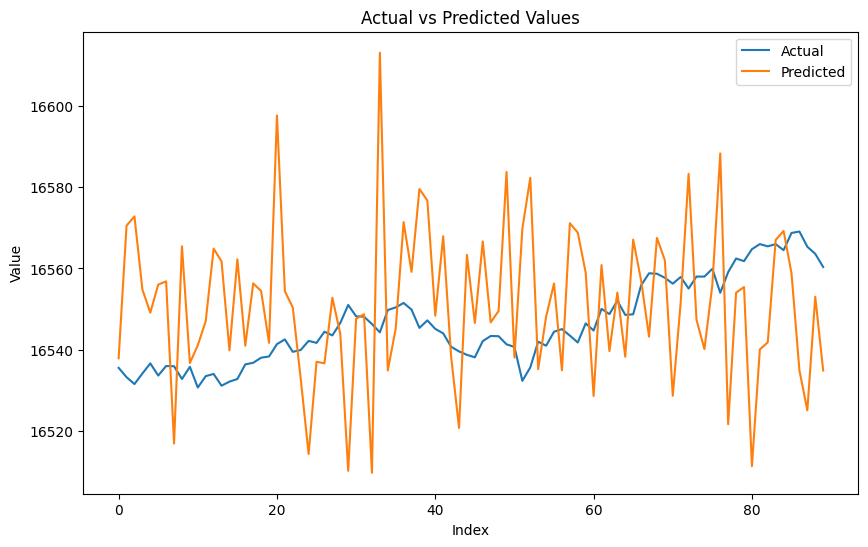

actual output data: 
[16544.7  16550.05 16548.75 16552.05 16548.55 16548.7  16555.85 16558.8
 16558.7  16557.7  16556.25 16557.9  16555.05 16558.   16558.   16559.9
 16554.   16559.1  16562.45 16561.8  16564.75 16566.   16565.45 16566.
 16564.5  16568.75 16569.1  16565.35 16563.6  16560.35 16559.35 16557.05
 16560.7  16558.6  16562.55 16565.9  16571.55 16573.95 16572.7  16572.45
 16577.   16570.6  16572.45 16568.   16567.5  16570.1  16569.2  16566.75
 16567.05 16570.35 16570.9  16571.   16572.4  16569.75 16570.25 16574.6
 16574.   16573.7  16575.6  16570.6  16572.65 16571.25 16571.1  16569.35
 16569.9  16567.1  16562.55 16562.9  16567.15 16570.75 16569.2  16568.85
 16568.55 16563.5  16565.7  16560.6  16569.7  16568.15 16575.65 16575.45
 16575.6  16575.2  16582.25 16585.55 16581.   16576.75 16577.7  16581.25
 16583.45 16586.95]
predicted data output: 
[16549.01  16589.656 16596.684 16577.182 16563.52  16572.5   16584.684
 16531.178 16587.143 16563.768 16559.861 16568.127 16592.508 16588

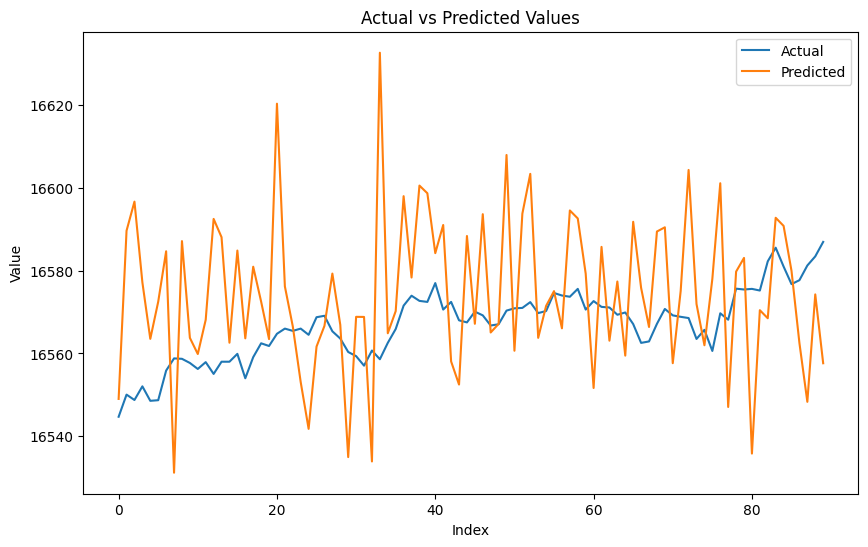

actual output data: 
[16572.65 16571.25 16571.1  16569.35 16569.9  16567.1  16562.55 16562.9
 16567.15 16570.75 16569.2  16568.85 16568.55 16563.5  16565.7  16560.6
 16569.7  16568.15 16575.65 16575.45 16575.6  16575.2  16582.25 16585.55
 16581.   16576.75 16577.7  16581.25 16583.45 16586.95 16586.   16586.75
 16589.15 16589.7  16589.2  16592.55 16592.75 16594.85 16600.35 16604.85
 16597.9  16591.65 16596.05 16597.   16594.7  16590.   16588.9  16587.8
 16593.7  16598.3  16596.65 16601.65 16606.95 16609.3  16613.35 16610.35
 16609.   16615.85 16614.2  16613.15 16621.1  16618.5  16622.1  16621.05
 16624.9  16620.45 16615.4  16618.7  16620.1  16620.15 16620.1  16619.5
 16620.6  16617.9  16617.05 16618.85 16616.65 16613.2  16615.95 16618.55
 16622.55 16624.45 16626.9  16632.3  16634.3  16633.05 16635.85 16635.15
 16636.4  16634.95]
predicted data output: 
[16571.031 16607.951 16617.236 16599.865 16580.957 16587.982 16603.566
 16556.871 16604.943 16591.168 16584.469 16590.578 16609.01  1661

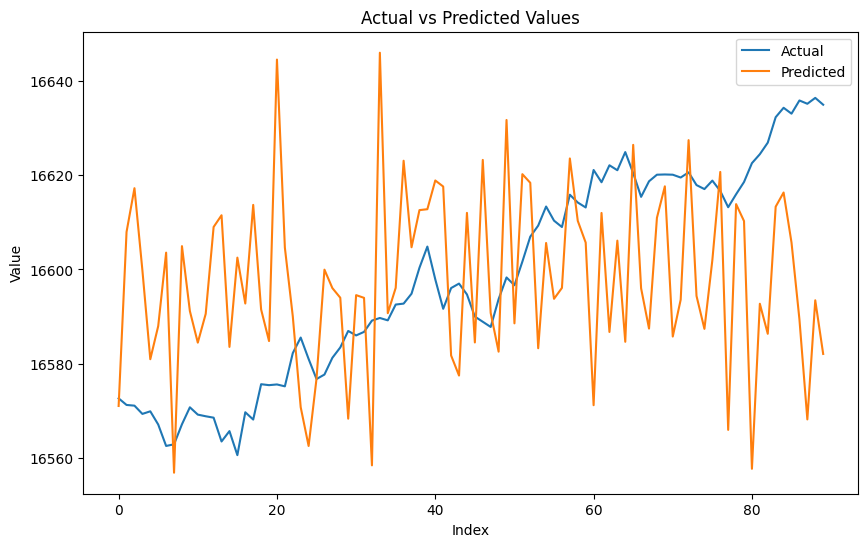

actual output data: 
[16679.35 16680.55 16683.85 16683.6  16682.   16690.4  16696.2  16690.45
 16687.2  16687.95 16694.55 16687.7  16690.2  16683.05 16682.6  16685.65
 16681.95 16675.2  16669.8  16674.25 16673.55 16669.15 16674.1  16670.9
 16671.2  16675.75 16678.45 16682.   16682.8  16685.65 16680.3  16683.2
 16683.7  16687.   16687.1  16691.75 16689.45 16688.55 16684.4  16686.6
 16682.65 16684.1  16691.7  16689.95 16688.25 16690.65 16682.65 16677.85
 16681.95 16679.   16684.25 16681.   16686.   16685.6  16688.15 16684.85
 16690.1  16688.4  16689.3  16689.5  16684.85 16687.15 16684.25 16685.2
 16683.85 16680.05 16679.6  16682.15 16680.45 16677.2  16678.2  16679.15
 16677.4  16682.15 16680.85 16674.8  16672.2  16674.15 16675.15 16676.45
 16673.2  16675.1  16679.05 16690.4  16702.   16696.95 16708.5  16709.1
 16704.9  16703.3 ]
predicted data output: 
[16678.455 16707.447 16722.72  16694.662 16696.49  16702.107 16703.379
 16667.086 16713.201 16683.516 16683.592 16684.924 16708.87  16706

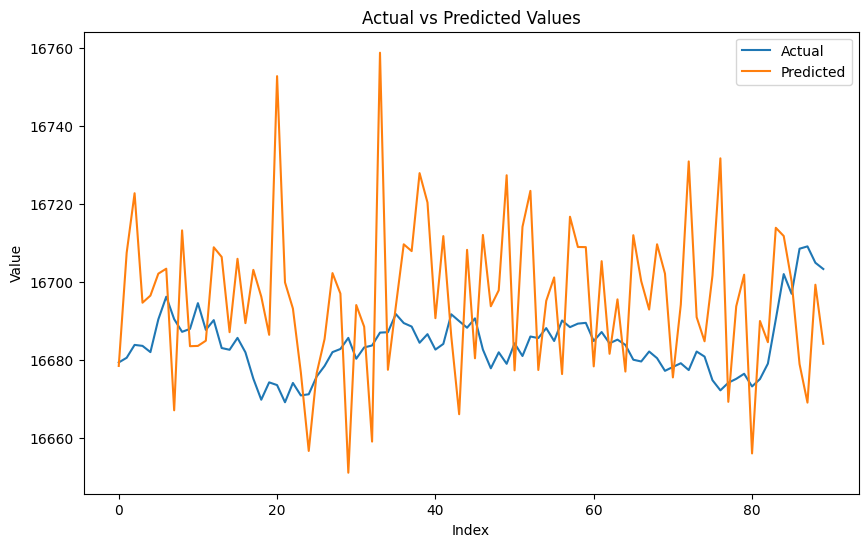

In [15]:
# Evaluate the model on the test data
import matplotlib.pyplot as plt

loss = model.evaluate(test_data_input, test_data_output)
print(f'Test loss: {loss}')

predictions = model.predict(test_data_input)

for i in range(10):
    # plt.figure(figsize=(10, 6))
    # plt.plot(test_data_output[i][60:], label='Actual')
    # plt.plot(predictions[i][60:], label='Predicted')
    # plt.xlabel('Index')
    # plt.ylabel('Value')
    # plt.title('Actual vs Predicted Values')
    # plt.legend()
    # plt.show()

    # plt.figure(figsize=(10, 6))
    # plt.plot(test_data_output[i][:60], label='Actual')
    # plt.plot(predictions[i][:60], label='Predicted')
    # plt.xlabel('Index')
    # plt.ylabel('Value')
    # plt.title('Actual vs Predicted Values')
    # plt.legend()
    # plt.show()
    print("actual output data: ")
    print(test_data_output[i])
    print("predicted data output: ")
    print(predictions[i])
    plt.figure(figsize=(10, 6))
    plt.plot(test_data_output[i], label='Actual')
    plt.plot(predictions[i], label='Predicted')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()



